<a href="https://colab.research.google.com/github/vaas-umputer/edge-cloud-workflow-scheduler/blob/main/uncertainty_aware_scheduler_review2_mar11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.5 MB/s eta 0:00:00


In [ ]:
!pip install stable-baselines3[extra] gym


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 859.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [ ]:
!pip install shimmy

In [ ]:
!pip install numpy torch_geometric networkx

In [ ]:
!pip install torch_scatter -f https://data.pyg.org/whl/torch-2.5.0+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.9 MB/s eta 0:00:00


In [ ]:
!pip install torch_cluster -f https://data.pyg.org/whl/torch-2.5.0+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.0 MB/s eta 0:00:00


In [ ]:
!pip install torch_spline_conv -f https://data.pyg.org/whl/torch-2.5.0+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.5.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 35.3 MB/s eta 0:00:00


In [ ]:
!pip install torch

In [ ]:
!pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.4 MB/s eta 0:00:00


LOADING AND VISUALIZING THE WORKFLOW

In [ ]:
import numpy as np
import networkx as nx
import json

def load_dag(file_path):
    with open(file_path, "r") as f:
        dag_data = json.load(f)

    cybershake_dag = nx.DiGraph()
    for node, attributes in dag_data["nodes"].items():
        cybershake_dag.add_node(node, **attributes)
    for parent, child, attributes in dag_data["edges"]:
        cybershake_dag.add_edge(parent, child, **attributes)
    return cybershake_dag

In [ ]:
workflow_dag = load_dag("cybershake_dag.json")

In [ ]:
node_attributes = {node: workflow_dag.nodes[node] for node in workflow_dag.nodes()}
print("Sample Node Attributes:", list(node_attributes.items())[:5])  # Show first 5 nodes

Sample Node Attributes: [('ID00000', {'runtime': 3.81, 'execution_time': 4.0, 'cpu_usage': 1.26, 'memory_usage': 0.02247536844384094, 'disk_usage': 0.5, 'power_usage': 11.82, 'machine_type': 'cloud', 'network_latency': 4.40791560297728, 'migration_energy': 0.1576858346700459, 'data_size': 10, 'CCR': 0.005}), ('ID00001', {'runtime': 9.38, 'execution_time': 8.0, 'cpu_usage': 0.21, 'memory_usage': 0.0222659384464059, 'disk_usage': 0.5, 'power_usage': 4.47, 'machine_type': 'edge', 'network_latency': 30.57163749729113, 'migration_energy': 5.114316294420685, 'edge_queue_delay': 7.1, 'data_size': 10, 'CCR': 0.025}), ('ID00002', {'runtime': 99.15, 'execution_time': 100.50746268656717, 'cpu_usage': 0.16388059701492538, 'memory_usage': 0.02784441883456679, 'disk_usage': 0.5, 'power_usage': 4.147164179104478, 'machine_type': 'cloud', 'network_latency': 1.0169148405181474, 'migration_energy': 0.1621171199688822, 'data_size': 10, 'CCR': 0.00019899019899019898}), ('ID00003', {'runtime': 44.1, 'execu

In [ ]:
edge_attributes = {edge: workflow_dag.edges[edge] for edge in workflow_dag.edges()}
print("Sample Edge Attributes:", list(edge_attributes.items())[:5])  # Show first 5 nodes

Sample Edge Attributes: [(('ID00002', 'ID00003'), {'CCR': 0.0004647918349364858, 'T_comm': 0.02, 'E_network': 0.002, 'bandwidth': 500, 'network_latency': 5}), (('ID00002', 'ID00005'), {'CCR': 0.0007324573665082472, 'T_comm': 0.02, 'E_network': 0.002, 'bandwidth': 500, 'network_latency': 5}), (('ID00002', 'ID00007'), {'CCR': 0.0005729166666666667, 'T_comm': 0.02, 'E_network': 0.002, 'bandwidth': 500, 'network_latency': 5}), (('ID00002', 'ID00009'), {'CCR': 0.0006451612903225806, 'T_comm': 0.02, 'E_network': 0.002, 'bandwidth': 500, 'network_latency': 5}), (('ID00002', 'ID00011'), {'CCR': 0.00036378783671202445, 'T_comm': 0.02, 'E_network': 0.002, 'bandwidth': 500, 'network_latency': 5})]


In [ ]:
edge_list = list(workflow_dag.edges())
print("Sample Edges (Task Dependencies):", edge_list[:5])  # Show first 5 edges


Sample Edges (Task Dependencies): [('ID00002', 'ID00003'), ('ID00002', 'ID00005'), ('ID00002', 'ID00007'), ('ID00002', 'ID00009'), ('ID00002', 'ID00011')]


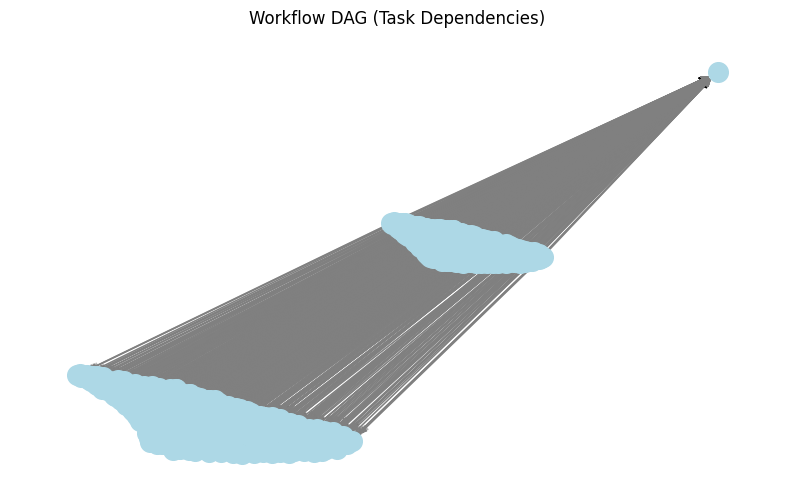

In [ ]:
import matplotlib.pyplot as plt
def plot_workflow_dag(G):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    nx.draw(G, pos, node_color="lightblue", edge_color="gray", node_size=200)
    plt.title("Workflow DAG (Task Dependencies)")
    plt.show()

# Call the function
plot_workflow_dag(workflow_dag)

In [ ]:
from pyvis.network import Network

def plot_large_dag(G):
    net = Network(notebook=True, height="750px", width="100%")
    net.from_nx(G)
    net.show("dag.html")  # Opens in a browser

plot_large_dag(workflow_dag)


dag.html


In [ ]:
#final model
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing, GATConv, global_mean_pool
import numpy as np
import networkx as nx
import json
from torch.cuda.amp import autocast, GradScaler
from sklearn.cluster import KMeans
import gym
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import os


# ---------------------- LOAD DAG & EXTRACT FEATURES ---------------------- #
def load_dag(file_path):
    with open(file_path, "r") as f:
        dag_data = json.load(f)

    cybershake_dag = nx.DiGraph()
    for node, attributes in dag_data["nodes"].items():
        cybershake_dag.add_node(node, **attributes)
    for parent, child, attributes in dag_data["edges"]:
        cybershake_dag.add_edge(parent, child, **attributes)
    return cybershake_dag


def compute_feature_stats(workflow_dag):
    execution_times, input_sizes, output_sizes, sla_deadlines, critical_paths = [], [], [], [], []

    for node in workflow_dag.nodes():
        node_data = workflow_dag.nodes[node]
        execution_times.append(node_data.get("runtime", 1.0))
        input_sizes.append(sum(f.get("size", 0) for f in node_data.get("input_files", []) if f is not None))
        output_sizes.append(sum(f.get("size", 0) for f in node_data.get("output_files", []) if f is not None))
        sla_deadlines.append(node_data.get("sla_deadline", execution_times[-1] * 1.5))
        try:
            critical_paths.append(
                max(len(path) for path in nx.all_simple_paths(workflow_dag, list(workflow_dag.nodes())[0], node))
                if nx.has_path(workflow_dag, list(workflow_dag.nodes())[0], node) else 0)
        except nx.NetworkXNoPath:
            critical_paths.append(0)

    stats = lambda x: {"min": np.min(x), "max": np.max(x), "mean": np.mean(x), "std": np.std(x)}
    return {
        "execution_time": stats(execution_times),
        "input_size": stats(input_sizes),
        "output_size": stats(output_sizes),
        "sla_deadline": stats(sla_deadlines),
        "critical_path": stats(critical_paths)
    }


def normalize(value, stats, method="minmax"):
    if method == "minmax":
        return (value - stats["min"]) / (stats["max"] - stats["min"]) if stats["max"] > stats["min"] else 0
    elif method == "zscore":
        return (value - stats["mean"]) / stats["std"] if stats["std"] > 0 else 0
    else:
        raise ValueError("Invalid normalization method.")


def prepare_workflow_dag(workflow_dag):
    feature_stats = compute_feature_stats(workflow_dag)
    node_id_to_idx = {node_id: idx for idx, node_id in enumerate(workflow_dag.nodes())}
    edges = [(node_id_to_idx[u], node_id_to_idx[v]) for u, v in workflow_dag.edges()]
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

    # Adjacency matrix for DAG
    num_nodes = workflow_dag.number_of_nodes()
    adjacency_matrix = torch.zeros((num_nodes, num_nodes), dtype=torch.float)
    for u, v in edges:
        adjacency_matrix[u, v] = 1

    # Topological order for positional encoding
    topo_order = list(nx.topological_sort(workflow_dag))
    node_features_list, edge_attr, execution_times, sla_adherences, task_priorities = [], [], [], [], []  # Corrected var name

    # Compute shortest path to each node
    shortest_path_lengths = {}
    for node in workflow_dag.nodes():
        try:
            shortest_path_lengths[node] = nx.shortest_path_length(workflow_dag, source=topo_order[0], target=node)
        except nx.NetworkXNoPath:
            shortest_path_lengths[node] = 0

    # Compute degree centrality
    degree_centrality = nx.degree_centrality(workflow_dag)

    for node in workflow_dag.nodes():
        node_data = workflow_dag.nodes[node]
        execution_time = node_data.get("runtime", 1.0)
        input_size = sum(f.get("size", 0) for f in node_data.get("input_files", []) if f is not None)
        output_size = sum(f.get("size", 0) for f in node_data.get("output_files", []) if f is not None)
        in_degree = workflow_dag.in_degree(node)
        out_degree = workflow_dag.out_degree(node)
        sla_deadline = node_data.get("sla_deadline", execution_time * 1.5)
        try:
            critical_path = max(len(path) for path in
                                nx.all_simple_paths(workflow_dag, topo_order[0], node)) if topo_order and nx.has_path(
                workflow_dag, topo_order[0], node) else 0
        except nx.NetworkXNoPath:
            critical_path = 0

        topo_rank = topo_order.index(node) / len(topo_order)

        # Positional Encodings
        shortest_path = shortest_path_lengths[node] / max(1, num_nodes)
        node_degree = degree_centrality[node]

        node_features = [  # Corrected local variable
            normalize(execution_time, feature_stats["execution_time"], "zscore"),
            normalize(input_size, feature_stats["input_size"], "minmax"),
            normalize(output_size, feature_stats["output_size"], "minmax"),
            in_degree / max(1, workflow_dag.number_of_nodes()),
            out_degree / max(1, workflow_dag.number_of_nodes()),
            normalize(sla_deadline, feature_stats["sla_deadline"], "minmax"),
            normalize(critical_path, feature_stats["critical_path"], "minmax"),
            topo_rank,
            shortest_path,  # Shortest Path
            node_degree  # Degree
        ]

        node_features_list.append(node_features) # Corrected append

        sla_adherence = 1 if execution_time <= sla_deadline else 0

        task_priority = 1 / (execution_time + critical_path + 1e-6)
        execution_times.append(normalize(execution_time, feature_stats["execution_time"], "zscore"))
        sla_adherences.append(sla_adherence)
        task_priorities.append(task_priority)

    sla_adherences = torch.tensor(sla_adherences, dtype=torch.float)
    sla_adherences = torch.clamp(sla_adherences, min=1e-6, max=1.0)  # Ensure valid BCELoss input


    for u, v in workflow_dag.edges():
        u_idx, v_idx = node_id_to_idx[u], node_id_to_idx[v]
        u_features, v_features = node_features_list[u_idx], node_features_list[v_idx]  # accessing features using new list
        edge_attr.append([
            abs(u_features[0] - v_features[0]),  # Execution time diff
            abs(u_features[1] - v_features[1]),  # Input size diff
            abs(u_features[2] - v_features[2]),  # Output size diff
            abs(u_features[5] - v_features[5])  # SLA diff
        ])

    node_features_tensor = torch.tensor(node_features_list, dtype=torch.float) # Creating node features tensor
    return (
        node_features_tensor,
        edge_index,
        torch.tensor(edge_attr, dtype=torch.float),
        adjacency_matrix,
        torch.tensor(execution_times, dtype=torch.float).unsqueeze(1),
        torch.tensor(sla_adherences, dtype=torch.float).unsqueeze(1),
        torch.tensor(task_priorities, dtype=torch.float).unsqueeze(1),
        node_features_list  # Passing the node feature list too for initial printing
    )

STATE REPRESENTATION MODULE

In [ ]:
#trial cell
# ---------------------- MODEL DEFINITION ---------------------- #
class CustomGraphTransformerLayer(MessagePassing):
    def __init__(self, in_features, out_features, heads=4, dropout=0.1, edge_dim=4):
        super().__init__(aggr='add', node_dim=0)
        self.heads = heads
        self.out_features = out_features
        self.dropout = dropout
        self.head_dim = out_features // heads

        self.W_Q = nn.Linear(in_features, out_features, bias=False)
        self.W_K = nn.Linear(in_features, out_features, bias=False)
        self.W_V = nn.Linear(in_features, out_features, bias=False)
        self.edge_mlp = nn.Sequential(
            nn.Linear(edge_dim, heads * 8),
            nn.ReLU(),
            nn.Linear(heads * 8, heads)
        )
        self.out_proj = nn.Linear(out_features, out_features)
        self.gate = nn.Linear(out_features, out_features)
        self.attn_weights = None

    def forward(self, x, edge_index, edge_attr):
        print(f"GraphTransformerLayer input x shape: {x.shape}")
        Q = self.W_Q(x).view(-1, self.heads, self.head_dim)
        print(f"Q shape: {Q.shape}")
        K = self.W_K(x).view(-1, self.heads, self.head_dim)
        V = self.W_V(x).view(-1, self.heads, self.head_dim)

        alpha = self.compute_attention(Q, K, edge_index, edge_attr)
        out = self.propagate(edge_index, x=V, alpha=alpha)
        out = out.view(-1, self.heads * self.head_dim)
        gate = torch.sigmoid(self.gate(out))
        return self.out_proj(out * gate)

    def compute_attention(self, Q, K, edge_index, edge_attr):
        q_i, k_j = Q[edge_index[0]], K[edge_index[1]]
        edge_weight = self.edge_mlp(edge_attr)
        attn_scores = (q_i * k_j).sum(dim=-1) + edge_weight  # Compute raw attention scores
        attn_scores = F.leaky_relu(attn_scores)
        alpha = torch.softmax(attn_scores, dim=0)  # Apply softmax

        self.attn_weights = alpha  # Store attention weights for visualization
        return alpha

    def message(self, x_j, alpha):
        return alpha.unsqueeze(-1) * x_j


class TaskEmbeddingModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, heads=4, embedding_dim=32, lstm_hidden=32, lstm_layers=2,
                 edge_dim=4, num_gnn_layers=2, num_transformer_layers=2):
        super().__init__()

        self.num_transformer_layers = num_transformer_layers
        self.num_gnn_layers = num_gnn_layers

        # ✅ Ensure Transformer layers output the same size as GNN input
        self.transformer_layers = nn.ModuleList([
            CustomGraphTransformerLayer(input_dim if i == 0 else hidden_dim, hidden_dim, heads=heads,
                                        edge_dim=edge_dim)
            for i in range(num_transformer_layers)])

        # ✅ Ensure GNN input matches the Transformer output
        self.feature_projection = nn.Linear(hidden_dim, embedding_dim)  # Transform features

        self.gnn_layers = nn.ModuleList([
            GATConv(embedding_dim if i == 0 else embedding_dim, embedding_dim, heads=1)
            for i in range(num_gnn_layers)])

        self.lstm = nn.LSTM(embedding_dim, lstm_hidden, lstm_layers, batch_first=True)
        self.fc_time = nn.Linear(lstm_hidden, 1)
        self.fc_sla = nn.Linear(lstm_hidden, 1)
        self.fc_priority = nn.Linear(lstm_hidden, 1)

        # Learnable task weights for dynamic loss
        self.log_sigma_time = nn.Parameter(torch.zeros(1))
        self.log_sigma_sla = nn.Parameter(torch.zeros(1))
        self.log_sigma_priority = nn.Parameter(torch.zeros(1))

    def forward(self, x, edge_index, edge_attr, batch):
        # ✅ Fix Transformer-GNN Shape Mismatch
        for i in range(max(self.num_transformer_layers, self.num_gnn_layers)):
            if i < self.num_transformer_layers:
                x = F.relu(self.transformer_layers[i](x, edge_index, edge_attr))

        x = self.feature_projection(x)  # ✅ Ensures correct size before GNN

        for i in range(self.num_gnn_layers):
            x = F.relu(self.gnn_layers[i](x, edge_index))

        # Graph-level read-out using global mean pooling
        graph_embedding = global_mean_pool(x, batch)

        lstm_input = x.unsqueeze(0)
        lstm_out, _ = self.lstm(lstm_input)
        lstm_out = lstm_out.squeeze(0)

        exec_time_pred = self.fc_time(lstm_out)
        sla_pred = torch.sigmoid(self.fc_sla(lstm_out))
        priority_pred = torch.sigmoid(self.fc_priority(lstm_out))
        return torch.cat([x, exec_time_pred, sla_pred, priority_pred], dim=1), graph_embedding


In [ ]:
# ---------------------- TRAINING ---------------------- #
from sklearn.preprocessing import MinMaxScaler

def train_embeddings(node_features, edge_index, edge_attr, execution_times, sla_adherences, task_priorities, node_features_list,
                     epochs=500, save_path="./model_data"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Ensure save directory exists
    os.makedirs(save_path, exist_ok=True)

    # ✅ Normalize execution times BEFORE passing to the model
    scaler = MinMaxScaler()
    execution_times = torch.tensor(scaler.fit_transform(execution_times.cpu().numpy()), dtype=torch.float).to(device)

    model = TaskEmbeddingModel(node_features.size(1), num_gnn_layers=1, num_transformer_layers=1).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    scaler = GradScaler() if device.type == "cuda" else None

    data = [node_features, edge_index, edge_attr, execution_times, sla_adherences, task_priorities]
    data = [x.to(device) for x in data]
    node_features, edge_index, edge_attr, execution_times, sla_adherences, task_priorities = data

    criterion_time = nn.L1Loss()
    criterion_sla = nn.BCELoss()
    criterion_priority = nn.L1Loss()

    # ✅ Print SLA labels to check if they are all 0s
    print("Unique SLA Adherence Values:", torch.unique(sla_adherences))

    # ✅ Scale SLA loss for better training
    sla_adherences = torch.clamp(sla_adherences, min=1e-6, max=1.0)  # Ensure valid BCELoss input

    # Create a batch vector for graph-level pooling (assuming single graph)
    batch = torch.zeros(node_features.size(0), dtype=torch.long).to(device)

    # ✅ Add loss tracking dictionary
    loss_history = {
        "total_loss": [],
        "loss_time": [],
        "loss_sla": [],
        "loss_priority": [],
        "sigma_time": [],
        "sigma_sla": [],
        "sigma_priority": []
    }

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        with autocast(enabled=device.type == "cuda"):
            embeddings, graph_embedding = model(node_features, edge_index, edge_attr, batch)  # Get graph embedding too
            exec_time_pred = embeddings[:, -3].unsqueeze(1)
            sla_pred = embeddings[:, -2].unsqueeze(1)
            priority_pred = embeddings[:, -1].unsqueeze(1)

            loss_time = criterion_time(exec_time_pred, execution_times)
            loss_sla = criterion_sla(sla_pred, sla_adherences)
            loss_priority = criterion_priority(priority_pred, task_priorities)

            # ✅ Scale SLA Loss to prevent it from vanishing
            loss_sla_scaled = loss_sla * 10  # Increase SLA loss impact

            # Normalize loss values before dynamic weighting
            loss_time_norm = loss_time / loss_time.detach().max()
            loss_sla_norm = loss_sla_scaled / loss_sla_scaled.detach().max()
            loss_priority_norm = loss_priority / loss_priority.detach().max()

            # ✅ Prevent dynamic loss scaling from becoming too small
            sigma_time = torch.exp(-model.log_sigma_time).clamp(min=0.1)
            sigma_sla = torch.exp(-model.log_sigma_sla).clamp(min=0.1)
            sigma_priority = torch.exp(-model.log_sigma_priority).clamp(min=0.1)

            loss_time_weighted = 0.5 * sigma_time * loss_time_norm + 0.5 * model.log_sigma_time
            loss_sla_weighted = 0.3 * sigma_sla * loss_sla_norm + 0.3 * model.log_sigma_sla
            loss_priority_weighted = 0.2 * sigma_priority * loss_priority_norm + 0.2 * model.log_sigma_priority

            loss = loss_time_weighted + loss_sla_weighted + loss_priority_weighted

        if scaler:
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            optimizer.step()

        # ✅ Track loss values
        loss_history["total_loss"].append(loss.item())
        loss_history["loss_time"].append(loss_time.item())
        loss_history["loss_sla"].append(loss_sla.item())
        loss_history["loss_priority"].append(loss_priority.item())
        loss_history["sigma_time"].append(sigma_time.item())
        loss_history["sigma_sla"].append(sigma_sla.item())
        loss_history["sigma_priority"].append(sigma_priority.item())

        if epoch % 10 == 0:
            print(
                f"Epoch {epoch}, Loss: {loss.item():.4f}, Time Loss: {loss_time.item():.4f}, SLA Loss: {loss_sla.item():.4f}, Priority Loss: {loss_priority.item():.4f}")

    # ✅ Save loss history
    np.save(os.path.join(save_path, "loss_history.npy"), loss_history)
    print(f"Loss history saved to {save_path}/loss_history.npy")

    # Save model, embeddings, and graph embedding after training
    torch.save(model.state_dict(), os.path.join(save_path, "model.pth"))

    # Detach and move to CPU before saving as numpy arrays
    node_embeddings_cpu = embeddings[:, :-3].detach().cpu().numpy()
    graph_embedding_cpu = graph_embedding.detach().cpu().numpy()

    np.save(os.path.join(save_path, "task_embeddings.npy"), node_embeddings_cpu)
    np.save(os.path.join(save_path, "graph_embedding.npy"), graph_embedding_cpu)

    print(f"Model, task embeddings, and graph embedding saved to {save_path}")

    return model


In [ ]:
import os

# Load and prepare data
workflow_dag = load_dag("cybershake_dag.json")
(node_features, edge_index, edge_attr, adjacency_matrix, execution_times, sla_adherences,
 task_priorities, node_features_list) = prepare_workflow_dag(workflow_dag)

# Print initial node features
print("Initial Node Features:")
for i, features in enumerate(node_features_list):
    print(f"Node {i}: {features}")

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Train model
embedding_model_save_path = "./embedding_model_data"
model = train_embeddings(node_features, edge_index, edge_attr, execution_times, sla_adherences,
                         task_priorities, node_features_list, save_path=embedding_model_save_path)

# Save model
torch.save(model.state_dict(), os.path.join(embedding_model_save_path, "trained_model.pth"))

# Save node features, edge index, and edge attributes for later visualization
np.save(os.path.join(embedding_model_save_path, "node_features.npy"), node_features.cpu().numpy())
np.save(os.path.join(embedding_model_save_path, "edge_index.npy"), edge_index.cpu().numpy())
np.save(os.path.join(embedding_model_save_path, "edge_attr.npy"), edge_attr.cpu().numpy())

print(f"Model training complete. Saved at {embedding_model_save_path}.")


<ipython-input-64-31e26a87a9f0>:159: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(sla_adherences, dtype=torch.float).unsqueeze(1),
<ipython-input-62-6ef5fed1a07e>:52: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=device.type == "cuda"):


Initial Node Features:
Node 0: [-0.7908287615665436, 0, 0, 0.497, 0.0, 0.018099045081057072, 4.0, 0.999, 0.003, 0.4974974974974975]
Node 1: [-0.5582804480397533, 0, 0, 0.497, 0.0, 0.0490228736397957, 3.0, 0.997, 0.002, 0.4974974974974975]
Node 2: [3.1896301633246904, 0, 0, 0.0, 0.109, 0.5474128358871865, 1.0, 0.0, 0.0, 0.1091091091091091]
Node 3: [0.8912846229925903, 0, 0, 0.001, 0.002, 0.24178325560737288, 2.0, 0.004, 0.001, 0.003003003003003003]
Node 4: [-0.8885241033354284, 0, 0, 0.001, 0.001, 0.005107705973795247, 3.0, 0.501, 0.002, 0.002002002002002002]
Node 5: [0.14353950714612498, 0, 0, 0.001, 0.002, 0.1423495447479458, 2.0, 0.005, 0.001, 0.003003003003003003]
Node 6: [-0.9164967011923313, 0, 0, 0.001, 0.001, 0.0013879635798356655, 3.0, 0.502, 0.002, 0.002002002002002002]
Node 7: [0.4846382004161205, 0, 0, 0.001, 0.002, 0.18770819453697532, 2.0, 0.006, 0.001, 0.003003003003003003]
Node 8: [-0.9177492055739838, 0, 0, 0.001, 0.001, 0.001221407950255385, 3.0, 0.503, 0.002, 0.002002

Using device: cpu
Trained model loaded successfully.
Loaded saved other data successfully.
GraphTransformerLayer input x shape: torch.Size([1000, 10])
Q shape: torch.Size([1000, 4, 16])


<ipython-input-67-9c125d2087a6>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(embedding_model_save_path, "trained_model.pth

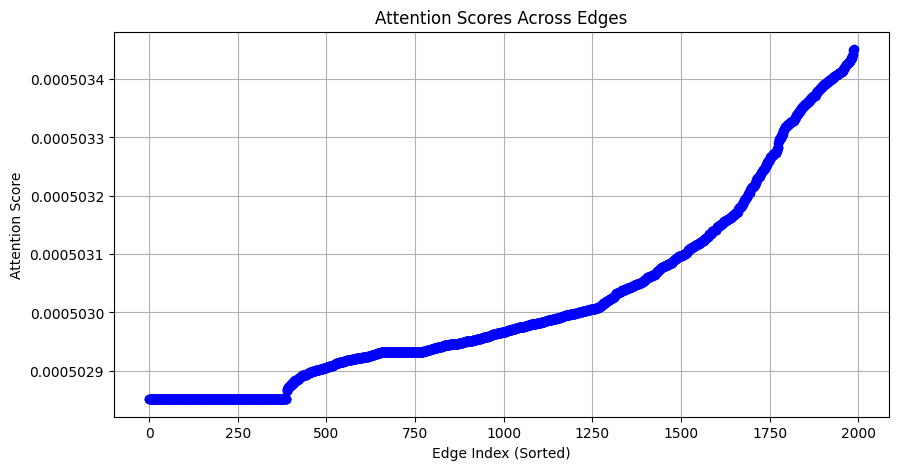

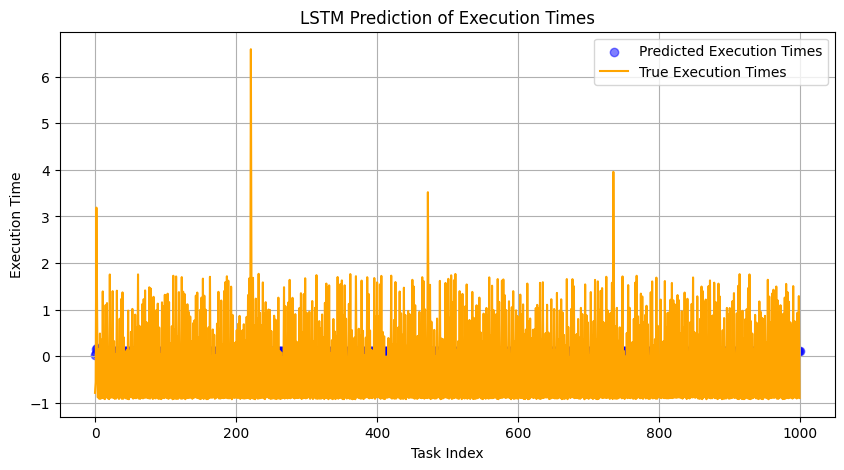


📉 Final Loss Values:
Execution Time Loss: 0.1199
SLA Loss: 0.0000
Priority Loss: 0.4061

📊 Loss Progress Over Training:
Time Loss: 0.1379 | SLA Loss: 0.7608 | Priority Loss: 0.4708
Time Loss: 0.1199 | SLA Loss: 0.1340 | Priority Loss: 0.4297
Time Loss: 0.1202 | SLA Loss: 0.0051 | Priority Loss: 0.4070
Time Loss: 0.1202 | SLA Loss: 0.0003 | Priority Loss: 0.4069
Time Loss: 0.1201 | SLA Loss: 0.0000 | Priority Loss: 0.4067
Time Loss: 0.1200 | SLA Loss: 0.0000 | Priority Loss: 0.4065
Time Loss: 0.1199 | SLA Loss: 0.0000 | Priority Loss: 0.4064
Time Loss: 0.1199 | SLA Loss: 0.0000 | Priority Loss: 0.4062
Time Loss: 0.1199 | SLA Loss: 0.0000 | Priority Loss: 0.4061
Time Loss: 0.1199 | SLA Loss: 0.0000 | Priority Loss: 0.4061


In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load trained model
embedding_model_save_path = "./embedding_model_data"
model = TaskEmbeddingModel(input_dim=10, num_gnn_layers=1, num_transformer_layers=1).to(device)  # Adjust input_dim if needed
model.load_state_dict(torch.load(os.path.join(embedding_model_save_path, "trained_model.pth"), map_location=device))
model.eval()
print("Trained model loaded successfully.")

# Load saved data
node_features = torch.tensor(np.load(os.path.join(embedding_model_save_path, "node_features.npy")), dtype=torch.float).to(device)
edge_index = torch.tensor(np.load(os.path.join(embedding_model_save_path, "edge_index.npy")), dtype=torch.long).to(device)
edge_attr = torch.tensor(np.load(os.path.join(embedding_model_save_path, "edge_attr.npy")), dtype=torch.float).to(device)
# Load saved task embeddings and graph embedding
task_embeddings = np.load(os.path.join(embedding_model_save_path, "task_embeddings.npy"))
graph_embedding = np.load(os.path.join(embedding_model_save_path, "graph_embedding.npy"))

print("Loaded saved other data successfully.")

# -------------------------------- #
# 🔍 Visualization Functions #
# -------------------------------- #

## **Graph Attention Visualization**
def plot_attention_scores(attn_weights):
    attn_values = attn_weights.mean(dim=1).cpu().numpy()  # Take the mean over heads

    plt.figure(figsize=(10, 5))
    plt.plot(range(len(attn_values)), np.sort(attn_values), marker='o', linestyle='-', color='b')

    plt.xlabel("Edge Index (Sorted)")
    plt.ylabel("Attention Score")
    plt.title("Attention Scores Across Edges")
    plt.grid(True)
    plt.show()

# Ensure attn_weights is updated before calling plot_attention_scores()
with torch.no_grad():
    model.eval()
    _, _ = model(node_features.to(device), edge_index.to(device), edge_attr.to(device),
                 torch.zeros(node_features.size(0), dtype=torch.long).to(device))

# Now attn_weights should not be None
if model.transformer_layers[0].attn_weights is not None:
    plot_attention_scores(model.transformer_layers[0].attn_weights)
else:
    print("Attention weights were not updated. Check compute_attention().")



## **LSTM Execution Time Predictions**
def plot_execution_predictions(exec_times, true_exec_times):
    """Plots predicted vs. true execution times with better visibility."""
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(exec_times)), exec_times, marker='o', color='b', label="Predicted Execution Times", alpha=0.5)
    plt.plot(range(len(true_exec_times)), true_exec_times, color='orange', label="True Execution Times", linewidth=1.5)

    plt.xlabel("Task Index")
    plt.ylabel("Execution Time")
    plt.title("LSTM Prediction of Execution Times")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_execution_predictions(exec_time_pred, execution_times.cpu().numpy())


# Load loss history
loss_history = np.load(os.path.join(embedding_model_save_path, "loss_history.npy"), allow_pickle=True).item()

# Print final loss values
print("\n📉 Final Loss Values:")
print(f"Execution Time Loss: {loss_history['loss_time'][-1]:.4f}")
print(f"SLA Loss: {loss_history['loss_sla'][-1]:.4f}")
print(f"Priority Loss: {loss_history['loss_priority'][-1]:.4f}")

# Print loss values at every 50 epochs
print("\n📊 Loss Progress Over Training:")
for epoch in range(0, len(loss_history["total_loss"]), 50):
    print(f"Time Loss: {loss_history['loss_time'][epoch]:.4f} | "
          f"SLA Loss: {loss_history['loss_sla'][epoch]:.4f} | "
          f"Priority Loss: {loss_history['loss_priority'][epoch]:.4f}")


RL SCHEDULER

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [ ]:

def plot_rewards(rewards, title):
    plt.figure(figsize=(10, 5))
    plt.plot(rewards, label='Reward per Episode', color='blue')
    plt.xlabel('Episodes')
    plt.ylabel('Reward')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
from skfuzzy import control as ctrl
from sklearn.linear_model import LinearRegression
import skfuzzy as fuzz
import gym
import torch
import torch.nn as nn
import numpy as np
from gym import spaces

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------------------- Tier-1: Task Placement (Fuzzy + Neural Network) ---------------------- #
class Tier1SchedulerEnv(gym.Env):
    def __init__(self, task_embeddings):
        super(Tier1SchedulerEnv, self).__init__()
        self.task_embeddings = task_embeddings
        self.num_tasks = task_embeddings.shape[0]
        self.current_task = 0

        # Define fuzzy variables and membership functions
        self.execution_time = ctrl.Antecedent(np.arange(0, 1.5, 0.01), 'execution_time')
        self.sla_adherence = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'sla_adherence')
        self.energy_usage = ctrl.Consequent(np.arange(0, 2, 0.01), 'energy_usage')

        # Use automatic membership functions (poor, average, good)
        self.execution_time.automf(5)
        self.sla_adherence.automf(5)
        self.energy_usage.automf(5)

        # Define fuzzy rules with correct labels
        rule1 = ctrl.Rule(self.execution_time['good'] & self.sla_adherence['good'], self.energy_usage['poor'])
        rule2 = ctrl.Rule(self.execution_time['average'] & self.sla_adherence['average'], self.energy_usage['average'])
        rule3 = ctrl.Rule(self.execution_time['poor'] & self.sla_adherence['poor'], self.energy_usage['good'])

        self.energy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
        self.energy_sim = ctrl.ControlSystemSimulation(self.energy_ctrl)

        # State and action spaces
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(task_embeddings.shape[1],), dtype=np.float32)
        self.action_space = spaces.Discrete(3)  # {0: Cloud, 1: Edge, 2: Hybrid}

        # Neural network-based reward function
        self.reward_net = nn.Sequential(
          nn.Linear(task_embeddings.shape[1] + 3, 128),  # Added SLA & energy
          nn.ReLU(),
          nn.Linear(128, 64),
          nn.ReLU(),
          nn.Linear(64, 1)
      ).to(device)

    def step(self, action):
        task_embedding = self.task_embeddings[self.current_task]
        execution_time = task_embedding[-3].item()
        sla_adherence = task_embedding[-2].item()

        # Apply fuzzy logic for energy estimation
        self.energy_sim.input['execution_time'] = np.clip(execution_time, 0, 1.5)
        self.energy_sim.input['sla_adherence'] = np.clip(sla_adherence, 0, 1)

        try:
            self.energy_sim.compute()
            energy_usage = self.energy_sim.output.get('energy_usage', execution_time * 1.0)  # Default fallback
        except:
            energy_usage = execution_time * 1.0  # Safe fallback

        # Adjust energy usage based on action type
        energy_usage *= (1.2 if action == 0 else 0.8 if action == 1 else 0.9) # Cloud, Edge, Hybrid

        # Compute reward with neural network
        task_embedding_tensor = torch.tensor(task_embedding, dtype=torch.float).to(device)
        action_tensor = torch.tensor([action], dtype=torch.float).to(device)
        sla_tensor = torch.tensor([sla_adherence], dtype=torch.float).to(device)
        energy_tensor = torch.tensor([energy_usage], dtype=torch.float).to(device)

        reward_input = torch.cat([task_embedding_tensor, action_tensor, sla_tensor, energy_tensor])

        reward = self.reward_net(reward_input).item() - energy_usage

        predicted_reward = self.reward_net(reward_input).item()

        # Apply weights to balance SLA, execution time, and energy usage
        reward = (
            1.5 * predicted_reward  # Make RewardNet's output more significant
            + 2.0 * sla_adherence  # Encourage SLA adherence
            - 0.8 * execution_time  # Penalize long execution times
            - 0.5 * energy_usage  # Penalize excessive energy usage
        )


        # Proceed to the next task
        self.current_task += 1
        done = self.current_task >= self.num_tasks
        return task_embedding, reward, done, {}

    def reset(self):
        self.current_task = 0
        return self.task_embeddings[self.current_task]


# ---------------------- Tier-2: Resource Allocation (Fuzzy + Linear Regression) ---------------------- #
class Tier2SchedulerEnv(gym.Env):
    def __init__(self, task_embeddings, server_loads):
        super(Tier2SchedulerEnv, self).__init__()
        self.task_embeddings = task_embeddings
        self.num_tasks = task_embeddings.shape[0]
        self.num_servers = len(server_loads)
        self.server_loads = server_loads
        self.current_task = 0
        # Neural network-based reward function
        self.reward_net = nn.Sequential(
            nn.Linear(task_embeddings.shape[1] + 2, 128),  # Remove server_loads length
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        ).to(device)


        # Define fuzzy variables for server load and execution time
        self.server_load_fuzzy = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'server_load')
        self.execution_time_fuzzy = ctrl.Antecedent(np.arange(0, 1.6, 0.01), 'execution_time')
        self.adjusted_resource_use = ctrl.Consequent(np.arange(0, 1.6, 0.01), 'adjusted_resource_use')

        # Use correct automatic membership function names
        self.server_load_fuzzy.automf(3)
        self.execution_time_fuzzy.automf(3)
        self.adjusted_resource_use.automf(3)

        # Define fuzzy rules with correct labels
        resource_rule1 = ctrl.Rule(self.server_load_fuzzy['poor'] & self.execution_time_fuzzy['poor'], self.adjusted_resource_use['poor'])
        resource_rule2 = ctrl.Rule(self.server_load_fuzzy['average'] | self.execution_time_fuzzy['average'], self.adjusted_resource_use['average'])
        resource_rule3 = ctrl.Rule(self.server_load_fuzzy['good'] | self.execution_time_fuzzy['good'], self.adjusted_resource_use['good'])

        self.resource_ctrl = ctrl.ControlSystem([resource_rule1, resource_rule2, resource_rule3])
        self.resource_sim = ctrl.ControlSystemSimulation(self.resource_ctrl)

        # State and action spaces
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(task_embeddings.shape[1] + self.num_servers,), dtype=np.float32)
        self.action_space = spaces.MultiDiscrete([self.num_servers, 3])  # (server_id, execution_strategy)

        # Linear Regression model for rule weighting
        self.rule_weights = LinearRegression()
        self.rule_weights.fit(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0.2, 0.5, 0.7, 1.0]))



    def step(self, action):
      server_id, execution_strategy = action
      task_embedding = self.task_embeddings[self.current_task]
      server_load = self.server_loads[server_id]
      execution_time = task_embedding[-3].item()

      normalized_server_load = server_load / max(self.server_loads)
      normalized_execution_time = execution_time / 1.5  # Normalize execution time

      predicted_weights = np.clip(
          self.rule_weights.predict([[normalized_server_load, normalized_execution_time]]),
          0, 1
      )

      # Apply fuzzy logic for resource use adjustment
      self.resource_sim.input['server_load'] = np.clip(server_load, 0, 1)
      self.resource_sim.input['execution_time'] = np.clip(execution_time, 0, 1.5)
      self.resource_sim.compute()
      resource_usage_multiplier = self.resource_sim.output['adjusted_resource_use']

      adjusted_time = execution_time * (0.8 if execution_strategy == 0 else 1.1 if execution_strategy == 1 else 1.3) * resource_usage_multiplier
      adjusted_energy = execution_time * (1.5 if execution_strategy == 0 else 1.0 if execution_strategy == 1 else 0.8) * resource_usage_multiplier

      # Convert inputs to tensors
      task_embedding_tensor = torch.tensor(task_embedding, dtype=torch.float32).to(device)
      server_load_tensor = torch.tensor([server_load], dtype=torch.float32).to(device)
      execution_strategy_tensor = torch.tensor([execution_strategy], dtype=torch.float32).to(device)

      # Combine all inputs into a single tensor
      reward_input = torch.cat([task_embedding_tensor, server_load_tensor, execution_strategy_tensor])

      # Compute reward using the neural network
      predicted_reward = self.reward_net(reward_input).item()

      # Adjust final reward calculation
      reward = (
          1.5 * predicted_reward  # Make RewardNet's output more significant
          + 3.0 * task_embedding[-2].item()  # Encourage SLA adherence
          - 0.5 * execution_time  # Penalize long execution times
          - 1.0 * server_load  # Penalize overloaded servers
      )

      self.server_loads[server_id] += min(0.1, 1.0 - self.server_loads[server_id])

      self.current_task += 1
      done = self.current_task >= self.num_tasks
      return np.concatenate([task_embedding, self.server_loads]), reward, done, {}

    def reset(self):
        self.current_task = 0
        return np.concatenate([self.task_embeddings[self.current_task], self.server_loads])


In [ ]:

# Initialize Tier-1 and Tier-2 environments
tier1_env = Tier1SchedulerEnv(task_embeddings)


# Wrap environments for Stable-Baselines3
tier1_env = DummyVecEnv([lambda: tier1_env])



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [ ]:
tier2_env = Tier2SchedulerEnv(task_embeddings, np.random.rand(5))
tier2_env = DummyVecEnv([lambda: tier2_env])

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [ ]:
# Train Tier-1 Scheduler with improved reward function
tier1_model = PPO("MlpPolicy", tier1_env, verbose=1, tensorboard_log="./tier1_tensorboard/")
tier1_callback = EvalCallback(tier1_env, eval_freq=5000, callback_on_new_best=StopTrainingOnRewardThreshold(reward_threshold=50, verbose=1))
tier1_model.learn(total_timesteps=50000, callback=tier1_callback)
tier1_model.save("tier1_scheduler")

Using cpu device
Logging to ./tier1_tensorboard/PPO_2
-----------------------------
| time/              |      |
|    fps             | 778  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 556         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012910368 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -1.19e-07   |
|    learning_rate        | 0.0003      |
|    loss                 | 3.62e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00863    |
|    value_loss           | 8e+03       |
----------------------

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5000, episode_reward=-5495.55 +/- 0.00
Episode length: 1000.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 1e+03      |
|    mean_reward          | -5.5e+03   |
| time/                   |            |
|    total_timesteps      | 5000       |
| train/                  |            |
|    approx_kl            | 0.01123129 |
|    clip_fraction        | 0.144      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.06      |
|    explained_variance   | 5.96e-08   |
|    learning_rate        | 0.0003     |
|    loss                 | 3.9e+03    |
|    n_updates            | 20         |
|    policy_gradient_loss | -0.00832   |
|    value_loss           | 8.3e+03    |
----------------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 368  |
|    iterations      | 3    |
|    time_elapsed    | 16   |

In [ ]:
import os
import numpy as np
import tensorflow as tf

def load_tensorboard_data(log_dir):
    rewards = []
    timesteps = []

    ppo_runs = [f for f in os.listdir(log_dir) if f.startswith("PPO_")]
    for run in ppo_runs:
        event_dir = os.path.join(log_dir, run)
        for event_file in os.listdir(event_dir):
            event_path = os.path.join(event_dir, event_file)
            for event in tf.compat.v1.train.summary_iterator(event_path):
                for value in event.summary.value:
                    if "rollout/ep_rew_mean" in value.tag:
                        rewards.append(value.simple_value)
                        timesteps.append(event.step)

    return np.array(timesteps), np.array(rewards)

# Load TensorBoard data from PPO runs inside Tier-1 logs
tier1_log_dir = "./tier1_tensorboard/"
tier1_timesteps, tier1_rewards = load_tensorboard_data(tier1_log_dir)

# Print results
print("Tier-1 Training Progress Data:")
for t, r in zip(tier1_timesteps, tier1_rewards):
    print(f"Timestep: {t}, Reward: {r}")


Tier-1 Training Progress Data:


In [ ]:
# Train Tier-2 Scheduler
tier2_model = PPO("MlpPolicy", tier2_env, verbose=1, tensorboard_log="./tier2_tensorboard/")
tier2_callback = EvalCallback(tier2_env, eval_freq=1000, callback_on_new_best=StopTrainingOnRewardThreshold(reward_threshold=100, verbose=1))
tier2_model.learn(total_timesteps=10000, callback=tier2_callback)
tier2_model.save("tier2_scheduler")

Using cpu device
Logging to ./tier2_tensorboard/PPO_9
Eval num_timesteps=1000, episode_reward=2.24 +/- 0.00
Episode length: 10.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 10       |
|    mean_reward     | 2.24     |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


New best mean reward!
Eval num_timesteps=2000, episode_reward=2.24 +/- 0.00
Episode length: 10.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 10       |
|    mean_reward     | 2.24     |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 448  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
Eval num_timesteps=3000, episode_reward=2.53 +/- 0.00
Episode length: 10.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 10          |
|    mean_reward          | 2.53        |
| time/                   |             |
|    total_timesteps      | 3000        |
| train/                  |             |
|    approx_kl            | 0.008410202 |
|    clip_fraction        | 0.0632      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.7        |
|    explained_variance   | 0.0161      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.138       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00516    |
|    value_loss           | 0.608

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


New best mean reward!
Eval num_timesteps=4000, episode_reward=2.53 +/- 0.00
Episode length: 10.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 10       |
|    mean_reward     | 2.53     |
| time/              |          |
|    total_timesteps | 4000     |
---------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 402  |
|    iterations      | 2    |
|    time_elapsed    | 10   |
|    total_timesteps | 4096 |
-----------------------------
Eval num_timesteps=5000, episode_reward=2.53 +/- 0.00
Episode length: 10.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 10          |
|    mean_reward          | 2.53        |
| time/                   |             |
|    total_timesteps      | 5000        |
| train/                  |             |
|    approx_kl            | 0.010857785 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.67       |
|    explained_variance   | 0.728       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0862      |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0119     |
|    value_loss           | 0.185

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6000, episode_reward=2.53 +/- 0.00
Episode length: 10.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 10       |
|    mean_reward     | 2.53     |
| time/              |          |
|    total_timesteps | 6000     |
---------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 389  |
|    iterations      | 3    |
|    time_elapsed    | 15   |
|    total_timesteps | 6144 |
-----------------------------
Eval num_timesteps=7000, episode_reward=2.53 +/- 0.00
Episode length: 10.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 10          |
|    mean_reward          | 2.53        |
| time/                   |             |
|    total_timesteps      | 7000        |
| train/                  |             |
|    approx_kl            | 0.014444695 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.62       |
|    explained_variance   | 0.806       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0211      |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 0.145

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8000, episode_reward=2.53 +/- 0.00
Episode length: 10.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 10       |
|    mean_reward     | 2.53     |
| time/              |          |
|    total_timesteps | 8000     |
---------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 375  |
|    iterations      | 4    |
|    time_elapsed    | 21   |
|    total_timesteps | 8192 |
-----------------------------
Eval num_timesteps=9000, episode_reward=2.53 +/- 0.00
Episode length: 10.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 10          |
|    mean_reward          | 2.53        |
| time/                   |             |
|    total_timesteps      | 9000        |
| train/                  |             |
|    approx_kl            | 0.017757237 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.53       |
|    explained_variance   | 0.846       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0135      |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0188     |
|    value_loss           | 0.11 

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=2.53 +/- 0.00
Episode length: 10.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 10       |
|    mean_reward     | 2.53     |
| time/              |          |
|    total_timesteps | 10000    |
---------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


------------------------------
| time/              |       |
|    fps             | 378   |
|    iterations      | 5     |
|    time_elapsed    | 27    |
|    total_timesteps | 10240 |
------------------------------


In [ ]:
def evaluate_models(tier1_model, tier2_model, task_embeddings, server_loads, num_episodes=10):
    tier1_rewards = []
    tier2_rewards = []
    tier1_energy_usage = []
    tier2_energy_usage = []
    tier1_sla_adherence = []
    tier2_sla_adherence = []
    tier1_execution_time = []
    tier2_execution_time = []
    tier2_server_loads = []

    for episode in range(num_episodes):
        # Reset environments
        obs1 = tier1_env.reset()
        obs2 = tier2_env.reset()

        episode_tier1_rewards = []
        episode_tier2_rewards = []
        episode_tier1_energy = []
        episode_tier2_energy = []
        episode_tier1_sla = []
        episode_tier2_sla = []
        episode_tier1_time = []
        episode_tier2_time = []
        episode_tier2_loads = []

        for i in range(len(task_embeddings)):
            # Tier1: Task Placement
            action1, _ = tier1_model.predict(obs1, deterministic=True)
            obs1, reward1, done1, info1 = tier1_env.step(action1)
            episode_tier1_rewards.append(reward1)
            episode_tier1_energy.append(info1.get('energy_usage', 0))
            episode_tier1_sla.append(info1.get('sla_adherence', 0))
            episode_tier1_time.append(info1.get('execution_time', 0))

            # Tier2: Resource Allocation
            action2, _ = tier2_model.predict(obs2, deterministic=True)
            obs2, reward2, done2, info2 = tier2_env.step(action2)
            episode_tier2_rewards.append(reward2)
            episode_tier2_energy.append(info2.get('energy_usage', 0))
            episode_tier2_sla.append(info2.get('sla_adherence', 0))
            episode_tier2_time.append(info2.get('execution_time', 0))
            episode_tier2_loads.append(np.mean(tier2_env.server_loads))

            if done1 or done2:
                break

        # Store episode results
        tier1_rewards.append(np.mean(episode_tier1_rewards))
        tier2_rewards.append(np.mean(episode_tier2_rewards))
        tier1_energy_usage.append(np.mean(episode_tier1_energy))
        tier2_energy_usage.append(np.mean(episode_tier2_energy))
        tier1_sla_adherence.append(np.mean(episode_tier1_sla))
        tier2_sla_adherence.append(np.mean(episode_tier2_sla))
        tier1_execution_time.append(np.mean(episode_tier1_time))
        tier2_execution_time.append(np.mean(episode_tier2_time))
        tier2_server_loads.append(np.mean(episode_tier2_loads))

    # Print results
    print("Tier1 Evaluation:")
    print(f"  Average Reward: {np.mean(tier1_rewards):.4f}")
    print(f"  Average Energy Usage: {np.mean(tier1_energy_usage):.4f}")
    print(f"  Average SLA Adherence: {np.mean(tier1_sla_adherence):.4f}")
    print(f"  Average Execution Time: {np.mean(tier1_execution_time):.4f}")

    print("Tier2 Evaluation:")
    print(f"  Average Reward: {np.mean(tier2_rewards):.4f}")
    print(f"  Average Energy Usage: {np.mean(tier2_energy_usage):.4f}")
    print(f"  Average SLA Adherence: {np.mean(tier2_sla_adherence):.4f}")
    print(f"  Average Execution Time: {np.mean(tier2_execution_time):.4f}")
    print(f"  Average Server Load: {np.mean(tier2_server_loads):.4f}")

# Example usage
task_embeddings = np.random.rand(10, 5)  # Simulated task embeddings
server_loads = np.random.rand(5)  # Simulated server loads
evaluate_models(tier1_model, tier2_model, task_embeddings, server_loads)

ValueError: Error: Unexpected observation shape (1, 5) for Box environment, please use (32,) or (n_env, 32) for the observation shape.

In [ ]:
# Pad observations to match the expected shape
obs1 = np.pad(obs1, (0, 32 - len(obs1)), mode='constant')  # Pad to shape (32,)
obs2 = np.pad(obs2, (0, 32 - len(obs2)), mode='constant')  # Pad to shape (32,)

In [ ]:
print("Tier1 Observation Shape:", obs1.shape)
print("Tier2 Observation Shape:", obs2.shape)

Tier1 Observation Shape: (32, 63)
Tier2 Observation Shape: (32, 68)


In [ ]:
print("Tier1 Observation Space:", tier1_env.observation_space)
print("Tier2 Observation Space:", tier2_env.observation_space)

Tier1 Observation Space: Box(-inf, inf, (5,), float32)
Tier2 Observation Space: Box(-inf, inf, (10,), float32)
